# Time Series Plots

## Outine
- What is a Time Series plot
- Creating a Time Series plot using Pandas (and Matplotlib)
- Create a Forecasting Time Series plot using a Seasonal ARIMA model
- Wrapping up

  
 ### Definition of a Time Series plot
   
A time series plot is a graph where some measure of time is the unit on the x-axis. In fact, we label the x-axis the time-axis. The y-axis is for the variable that is being measured. Data points are plotted and generally connected with straight lines, which allows for the analysis of the graph generated. 

<img src="images/time_series_graph.png" width="400">


## Creating a Time Series plot using Pandas (and Matplotlib)

A Time Series plot in **matplotlib** is, in essence, a special case of a line plot. That is, we are plotting x and y points connected by a line, however, the x coordinates represent ``time``.

Let's look at an example:


In [7]:
import pandas as pd 
from dateutil.parser import parse
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

# convert the dataframe into a Series, there is only one column
ts = df['value']
ts.head()

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: value, dtype: int64

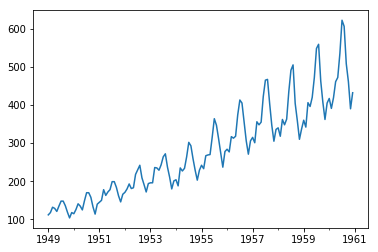

In [8]:
# visualize the time series with a simple line plot using pandas
ts.plot()

## Create a forcasting time series plot using a Seasonal ARIMA model
In the next example, we will use an ARIMA model - AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. 

Due to the seasonality of Air Travel, we will use an ARIMA model that accounts for Seasonality, named SARIMAX.

We will:
- define the model by analyzing the existing data set
- fit the model
- plot the original data along with the fitted data

c:\users\carmt\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


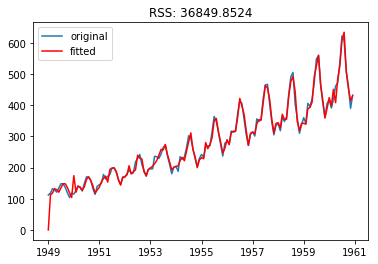

In [9]:
import matplotlib.pyplot as plt
# from statsmodels.tsa.arima_model import ARIMA
# include the Seasonal Arima Model for forecasting, SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(ts, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts, label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))
plt.legend()

Now that we have the fitted model, we can plot the original data along with a set of "predicted" data based on a time frame of our choosing:
- for actual data is from 1949 to 1961
- we will "predict" the values from May, 1957 to December, 1960 

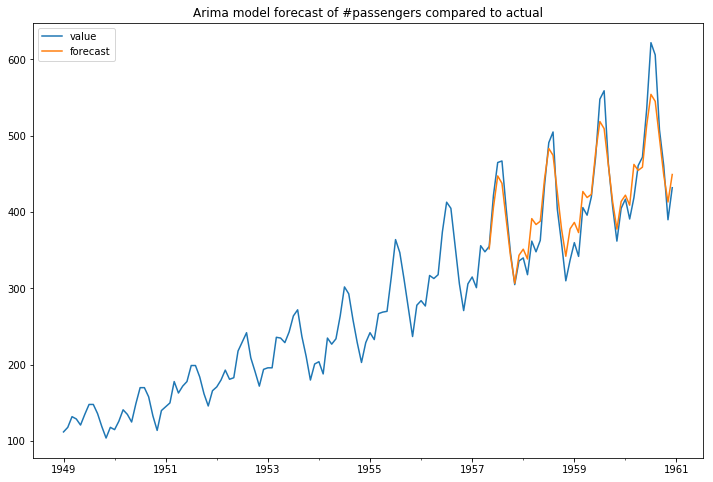

In [10]:
#convert our data series back into a dataframe
df = pd.DataFrame(ts)
# Add a forecast column to the dataframe that includes our predictions from the model
df['forecast'] = results_ARIMA.predict(start = '1957-05-01', end= '1960-12-01', dynamic= True)
# Plot the Dataframe data 
df[['value', 'forecast']].plot(figsize=(12, 8))
# Add a title
plt.title('Arima model forecast of #passengers compared to actual')
# Show the plot
plt.show()

## Wrapping up
We discussed:
- What is a Time Series plot
- Creating a Time Series plot using Pandas (and Matplotlib)
- Create a Forcasting Time Series plot using a Seasonal ARIMA model

For more examples of time series plots, see the Matplotlib gallery and Pandas.pydata.org:

https://matplotlib.org/3.1.1/gallery/index.html

https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

## For fun, this is what the Seasonal forecast would look like until the end of 2020

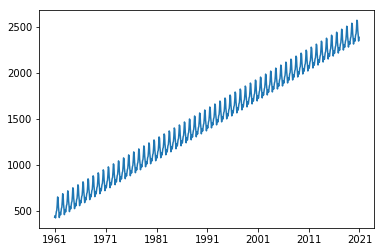

In [11]:
pred = results_ARIMA.predict(start = '1960-12-01', end= '2020-12-01', dynamic= True) 
plt.plot(pred, label='prediction')
plt.show()